In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/House_price.csv')

In [3]:
df_cat=df.select_dtypes(include='object')
df_cat.shape

(1459, 43)

In [4]:
df_cat.isnull().sum()/df_cat.shape[0]*100

MSZoning          0.274160
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.000000
KitchenQual       0.068540
Functional        0.137080
FireplaceQu      50.034270
GarageType        5.209047
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
P

In [5]:
drop_columns=[var for var in df_cat.columns if df_cat[var].isnull().sum()/df_cat.shape[0]*100>20]
drop_columns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [6]:
df_cat_drop=df_cat.drop(columns=drop_columns)
df_cat_drop.shape

(1459, 38)

In [7]:
df_cat_drop.isnull().sum()/df_cat_drop.shape[0]*100

MSZoning         0.274160
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.137080
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000000
KitchenQual      0.068540
Functional       0.137080
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
PavedDrive       0.000000
SaleType         0.068540
SaleCondition    0.000000
dtype: float

In [8]:
df_cat_drop['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [9]:
df_cat_drop['MasVnrType'].mode()

0    None
Name: MasVnrType, dtype: object

In [10]:
df_cat_drop['MasVnrType'].mode()[0]

'None'

In [11]:
df_cat_drop['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [12]:
df_cat_drop['MasVnrType'].fillna(df_cat_drop['MasVnrType'].mode()[0])

0          None
1       BrkFace
2          None
3       BrkFace
4          None
         ...   
1454       None
1455       None
1456       None
1457       None
1458    BrkFace
Name: MasVnrType, Length: 1459, dtype: object

In [13]:
missing_val=[var for var in df_cat_drop.columns if df_cat_drop[var].isnull().sum()/df_cat_drop.shape[0]*100>0]
missing_val

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [14]:
for features in df_cat[missing_val]:
  df_cat_drop[features].fillna(df_cat_drop[features].mode()[0],inplace=True)
  print(features+'='+df_cat_drop[features].mode()[0])

MSZoning=RL
Utilities=AllPub
Exterior1st=VinylSd
Exterior2nd=VinylSd
MasVnrType=None
BsmtQual=TA
BsmtCond=TA
BsmtExposure=No
BsmtFinType1=GLQ
BsmtFinType2=Unf
KitchenQual=TA
Functional=Typ
GarageType=Attchd
GarageFinish=Unf
GarageQual=TA
GarageCond=TA
SaleType=WD


In [15]:
df_cat_drop.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

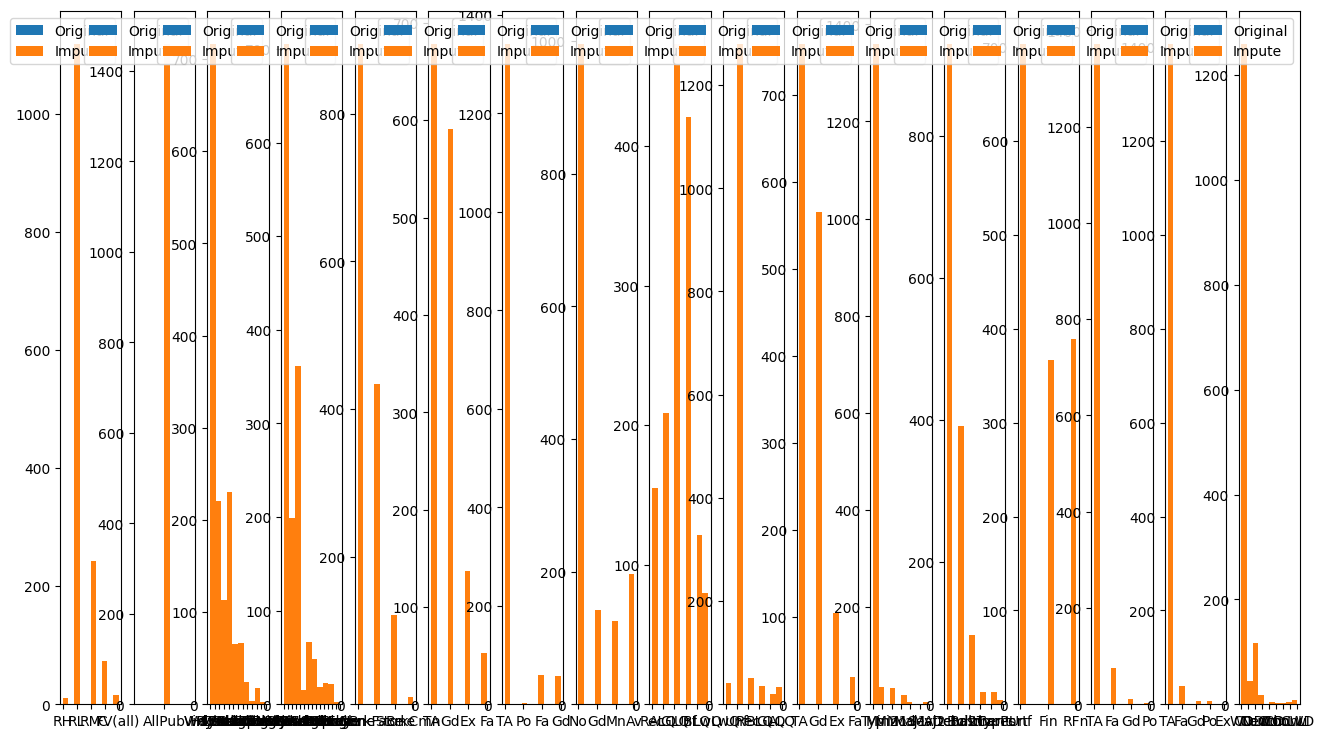

In [16]:
plt.figure(figsize=(16,9))
for index,item in enumerate(missing_val):
  plt.subplot(1,17,index+1)
  plt.hist(df[item].dropna(),label='Original')
  plt.hist(df_cat_drop[item],label='Impute')
  plt.legend()

In [17]:
df.update(df_cat_drop)

In [18]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [19]:
df.select_dtypes(include='object').isnull().sum()

MSZoning            0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
FireplaceQu       730
GarageType          0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            0
SaleCondition       0
dtype: int64

In [20]:
df=df.drop(columns=drop_columns)

In [22]:
df.select_dtypes(include='object').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64